## Importing the Dataset

In [10]:
import os
import urllib
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" ## URL where the compressed file is present
HOUSING_PATH=os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" ## full path of the downloaded file
def fetch_housing_data(housing_path= HOUSING_PATH,housing_url= HOUSING_URL): ## Defining a function to fetch the data for reusability
    os.makedirs(housing_path,exist_ok=True) ##(exists_ok=True) Prevent error if already exists
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) ## Downloads the file from URL 
    housing_tgz = tarfile.open(tgz_path) ## Opens the compress folder
    housing_tgz.extractall(path=housing_path) ## Extracts the housing.csv file
    housing_tgz.close()

fetch_housing_data()

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\795522203.py:14: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path) ## Extracts the housing.csv file


In [11]:
import pandas as pd
def load_dataset(housing_path=HOUSING_PATH): ## Defining a function to load the dataset
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing = load_dataset()

In [12]:
housing.shape

(20640, 10)

## About Data
- Contains 20640 records
- Contains 10 features 9 Independent and 1 Dependent Feature(median_house_value)
- Contains Data about the housing prices of different small districts of California,USA.

## Visualising the Data

In [13]:
import matplotlib.pyplot as plt

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


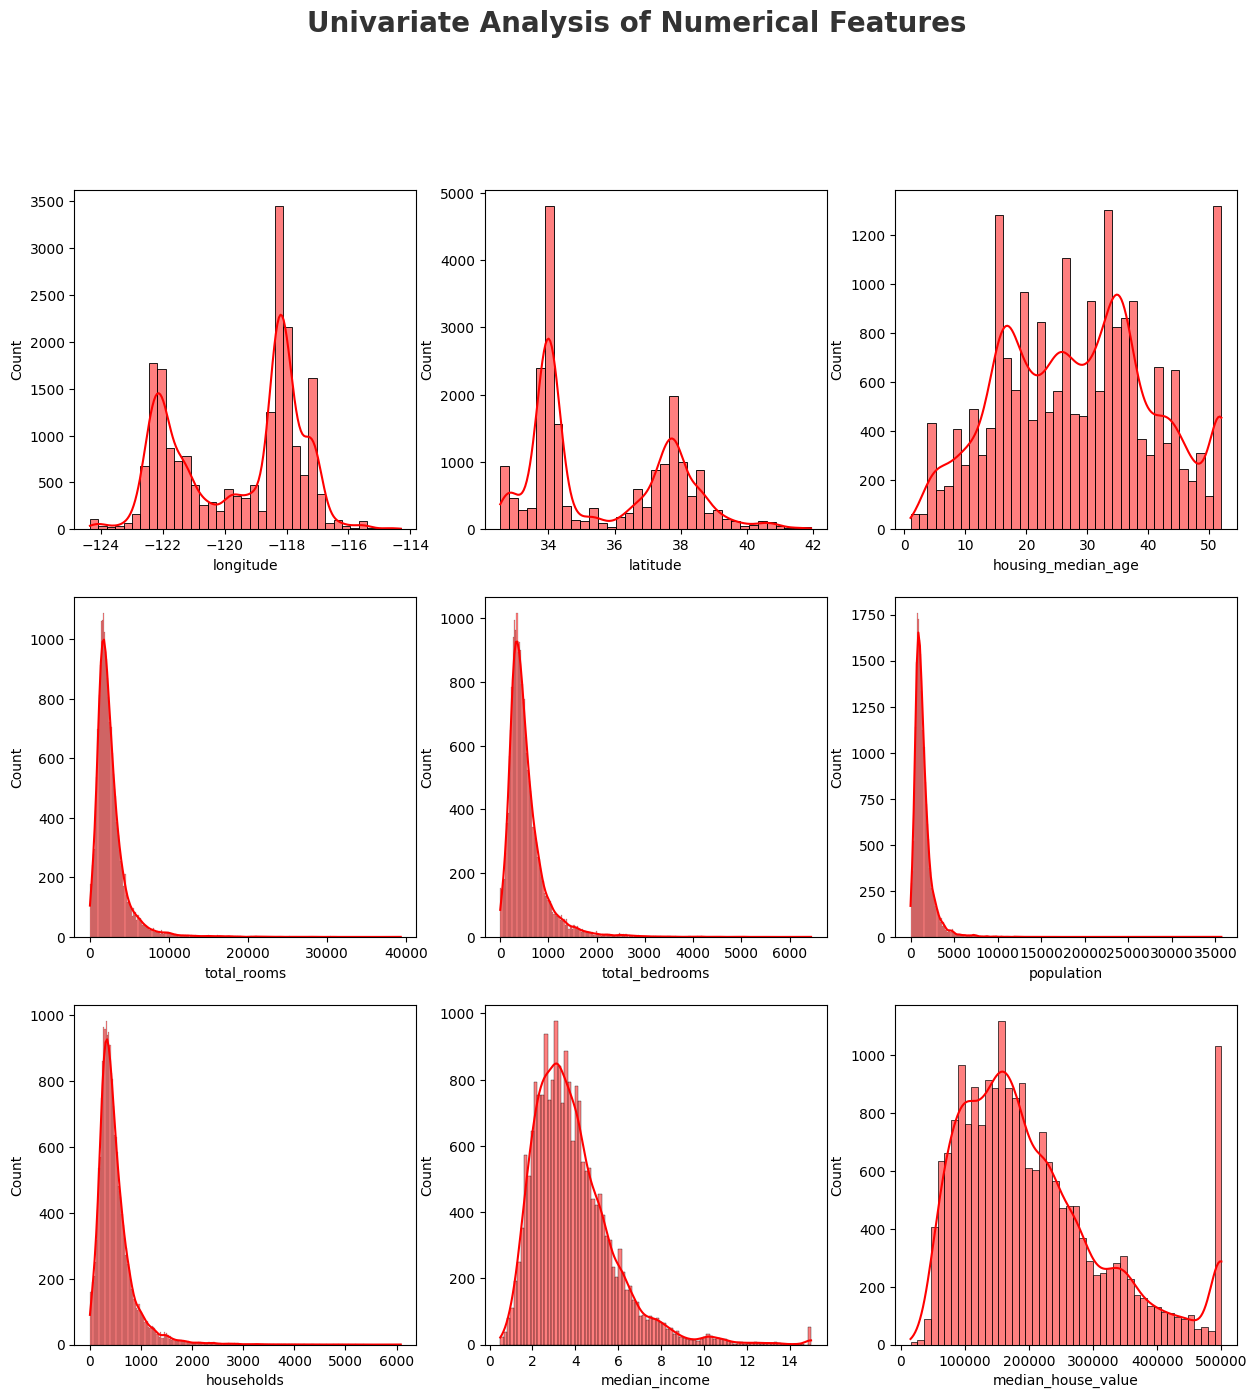

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_fet = [col for col in housing.columns if housing[col].dtype != "O"]
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(numerical_fet)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=housing[numerical_fet[i]], color="r", kde=True)
    plt.xlabel(numerical_fet[i])

### Observations 
- Price Cap at $500000 

- Creating a visualisation to view the properties in a map, it is pretty easy as we have coordinates

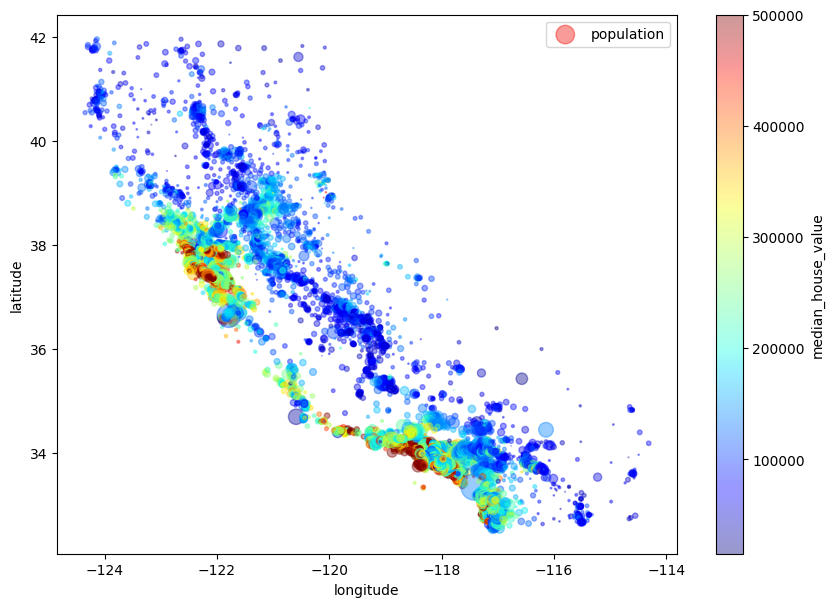

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

- Now, plotting a pairplot to visualize how to a feature change based on the change in another feature

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

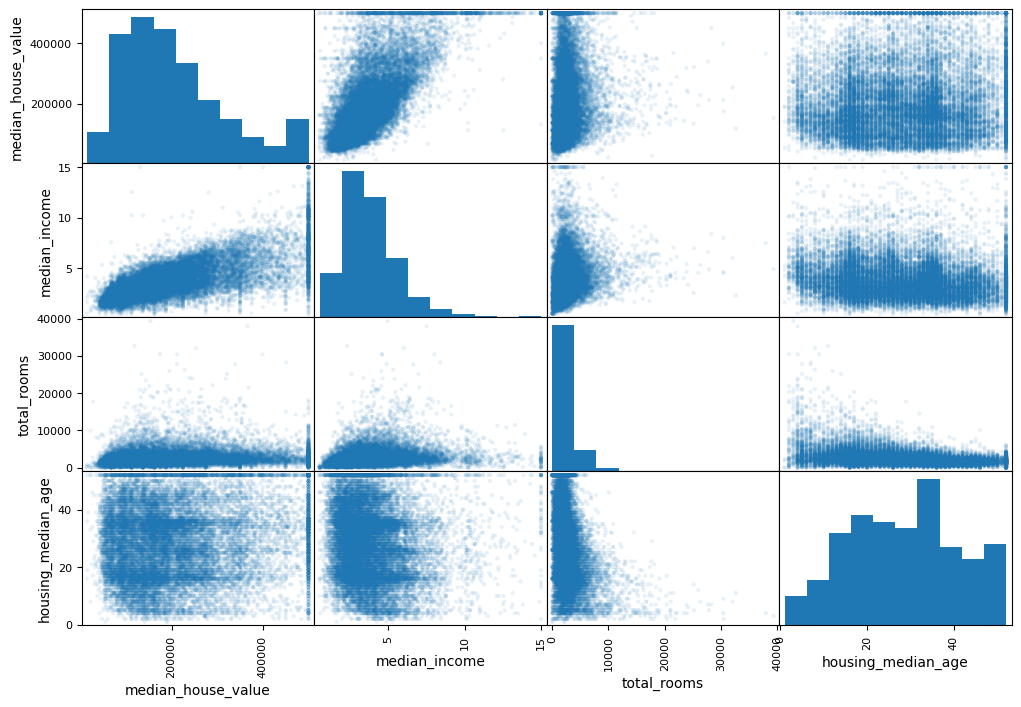

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8),alpha=0.1)

- after analysing we see that there is a cap price at 500000 and there are many vary aligned in a line i will fix that by removing the outliers
- we can do it by the IQR method

In [20]:
## Shape  before
housing.shape

(20640, 10)

In [21]:
q1 = housing["median_house_value"].quantile(0.25)
q3 = housing["median_house_value"].quantile(0.75)
iqr = q3 - q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

housing = housing[(housing["median_house_value"] >= lower_fence) & (housing["median_house_value"] <= upper_fence)]
housing.shape

(19569, 10)

- So this removed about 1000 datapoints
- Now plotting histplot and scatter matrix again

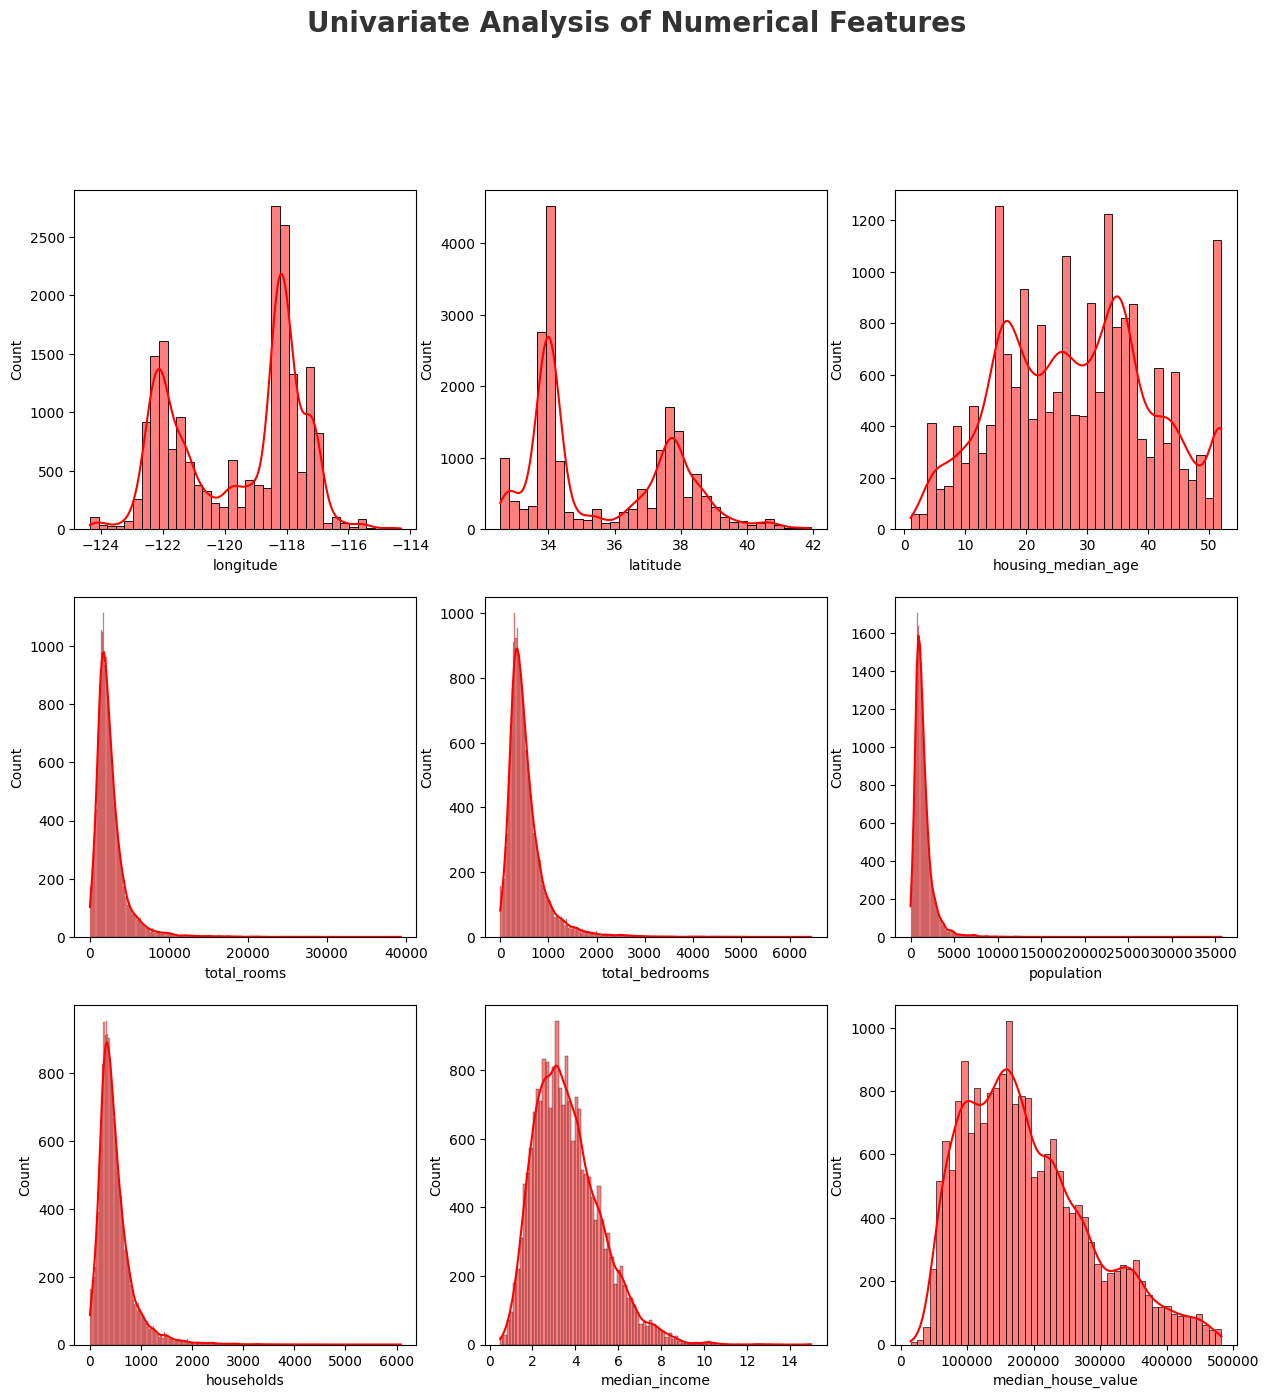

In [23]:

numerical_fet = [feature for feature in housing.columns if housing[feature].dtype != "O"]
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(numerical_fet)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=housing[numerical_fet[i]], color="r", kde=True)
    plt.xlabel(numerical_fet[i])

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

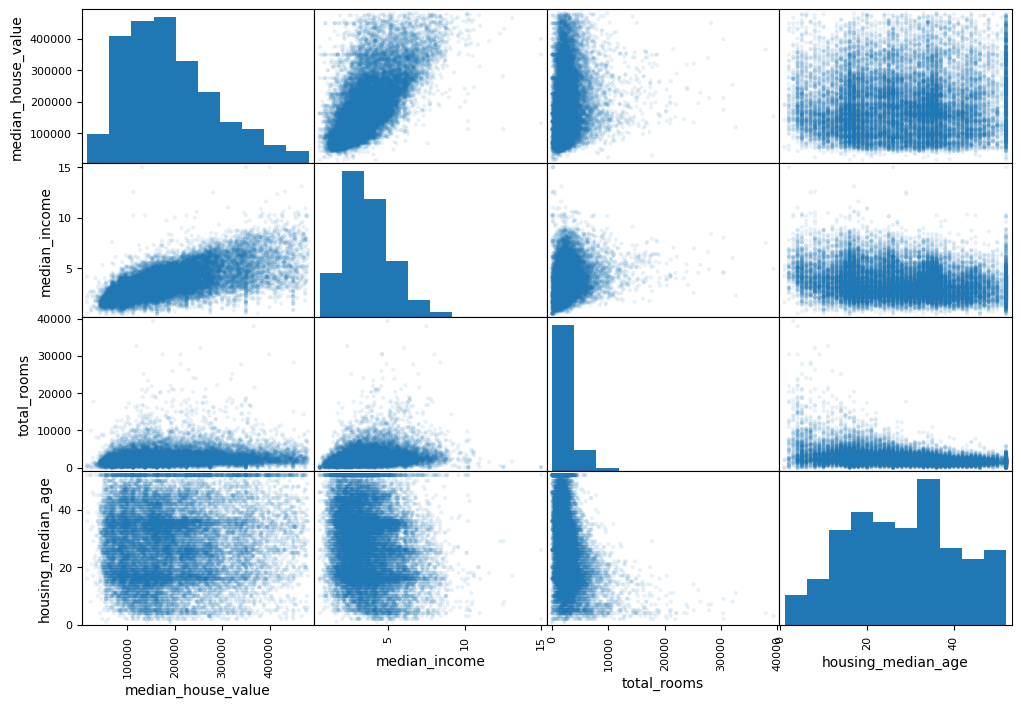

In [24]:
scatter_matrix(housing[attributes], figsize=(12, 8),alpha=0.1)

## Feature Engineering

assuming that the housing prices are highly correalted with median income of the district then splitting based upon income categpries will be a more efficient way we can do it by making an income categories column and then using a library to shuffle based upon the categries 

In [25]:
import numpy as np

In [26]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\63983417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\63983417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\63983417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [27]:
housing["income_sq"] = housing["median_income"]**2
housing["income_log"] = np.log1p(housing["median_income"])
housing["longitude_sq"] = housing["longitude"]**2
housing["latitude_sq"] = housing["latitude"]**2
housing["log_x_lat"] = housing["longitude"] * housing["latitude"]

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\2531679507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["income_sq"] = housing["median_income"]**2
C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\2531679507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["income_log"] = np.log1p(housing["median_income"])
C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\2531679507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [28]:
housing["population_per_household_log"] = np.log1p(housing["population_per_household"])
# housing["population_per_household"] = housing["population_per_household"]**2

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\3983828501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["population_per_household_log"] = np.log1p(housing["population_per_household"])


### Key Feature
- Creating a two features which will keep the information that a district is how much far from San Francisco and Los Angeles as near these cities Prices are higher

In [29]:
san_francisco_coordinates = (37.7749, -122.4194)
los_angeles_coordinates = (34.0549, -118.2426)

def haversine(lat1, lon1, lat2, lon2): ## Harvesine Distance -> Best for earth coordinates data
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

housing["distance_san_fancisco"] = haversine(housing["latitude"], housing["longitude"], san_francisco_coordinates[0], san_francisco_coordinates[1])
housing["distance_los_angeles"] = haversine(housing["latitude"], housing["longitude"], los_angeles_coordinates[0], los_angeles_coordinates[1])

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\4024585445.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["distance_san_fancisco"] = haversine(housing["latitude"], housing["longitude"], san_francisco_coordinates[0], san_francisco_coordinates[1])
C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\4024585445.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["distance_los_angeles"] = haversine(housing["latitude"], housing["longitude"], los_angeles_coordinates[0], los_angeles_coordinates[1])

In [30]:
housing.drop(columns=["total_rooms","total_bedrooms","population"], axis=1, inplace=True)
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\2320802924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(columns=["total_rooms","total_bedrooms","population"], axis=1, inplace=True)


median_house_value              1.000000
median_income                   0.644267
income_log                      0.628678
income_sq                       0.612834
log_x_lat                       0.108295
rooms_per_household             0.108223
households                      0.099352
housing_median_age              0.061480
longitude_sq                    0.047194
population_per_household       -0.020971
distance_san_fancisco          -0.032731
longitude                      -0.047342
distance_los_angeles           -0.131829
latitude                       -0.149100
latitude_sq                    -0.152846
bedrooms_per_room              -0.216033
population_per_household_log   -0.223495
Name: median_house_value, dtype: float64

In [31]:
housing.dropna(inplace=True)

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\3970074203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.dropna(inplace=True)


In [32]:
housing.drop(columns="ocean_proximity", inplace=True, axis=1)

C:\Users\ABC\AppData\Local\Temp\ipykernel_2084\2498584601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(columns="ocean_proximity", inplace=True, axis=1)


- Now Splitting the dataset into training, validation and test data

In [33]:
from sklearn.model_selection import train_test_split
X = housing.drop(columns="median_house_value")
y = housing["median_house_value"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_val_scaled = scaler_x.transform(X_val)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

In [36]:
## Now training some baseline models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     19369 non-null  float64
 1   latitude                      19369 non-null  float64
 2   housing_median_age            19369 non-null  float64
 3   households                    19369 non-null  float64
 4   median_income                 19369 non-null  float64
 5   median_house_value            19369 non-null  float64
 6   rooms_per_household           19369 non-null  float64
 7   bedrooms_per_room             19369 non-null  float64
 8   population_per_household      19369 non-null  float64
 9   income_sq                     19369 non-null  float64
 10  income_log                    19369 non-null  float64
 11  longitude_sq                  19369 non-null  float64
 12  latitude_sq                   19369 non-null  float64
 13  log_x_

### Simple Linear Regression

R2 Score: 0.6740318738218138, RMSE: 54907.75056459583


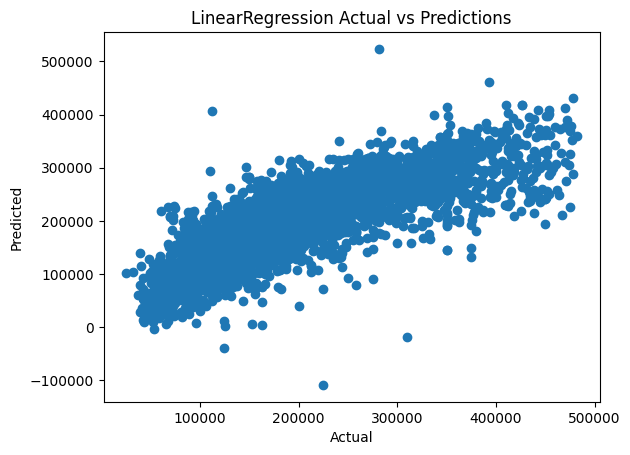

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}, RMSE: {root_mean_squared_error(y_test, y_pred_lr)}")
plt.scatter(y_test, y_pred_lr)
plt.title("LinearRegression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Linear Regression performs pretty bad on the data lets try other models

### Lasso Regression

R2 Score: 0.6327248546437814, RMSE: 0.6131176273395682
Best Parameters {'alpha': 0.01, 'max_iter': 1000}


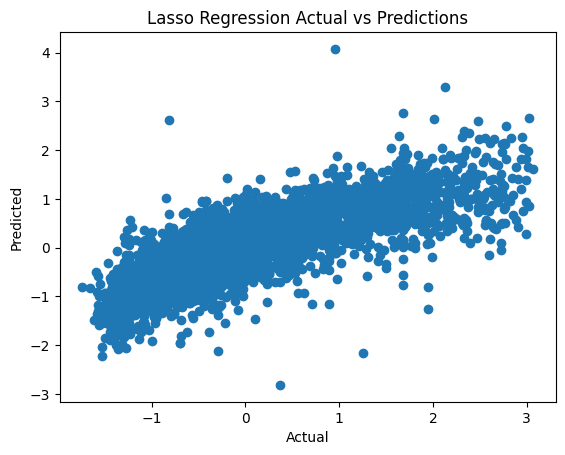

In [105]:
import warnings
warnings.filterwarnings("ignore")
lasso_reg = Lasso()
param_grid_lasso = {
    "alpha": [0.01, 0.05, 0.1, 0.5, 1, 2], 
    "max_iter": [100, 300, 500, 700, 1000]
}
lasso_search = GridSearchCV(param_grid=param_grid_lasso, estimator=lasso_reg)
lasso_search.fit(X_train_scaled, y_train_scaled)
y_pred_lasso = lasso_search.predict(X_test_scaled)
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_lasso)}, RMSE: {root_mean_squared_error(y_test_scaled, y_pred_lasso)}")
print(f"Best Parameters {lasso_search.best_params_}")
plt.scatter(y_test_scaled, y_pred_lasso)
plt.title("Lasso Regression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Also not good 

## Ridge Regression

R2 Score: 0.6487570531145961, RMSE: 0.5995864902539256
Best Parameters {'alpha': 1}


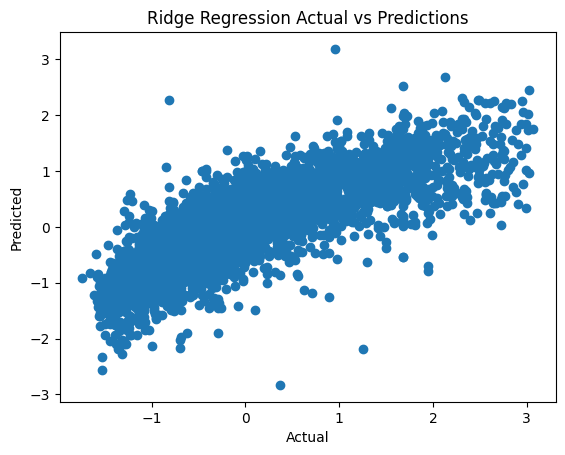

In [106]:
ridge_reg = Ridge()
param_grid_ridge = {
    "alpha": [1, 2, 3, 5, 7, 10]
}
ridge_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid_ridge)
ridge_search.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge_search.predict(X_test_scaled)
print(f"R2 Score: {r2_score(y_test_scaled, y_pred_ridge)}, RMSE: {root_mean_squared_error(y_test_scaled, y_pred_ridge)}")
print(f"Best Parameters {ridge_search.best_params_}")
plt.scatter(y_test_scaled, y_pred_ridge)
plt.title("Ridge Regression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

R2 Score: 0.6716961606200333, RMSE: 55104.119206998104
Best Parameters {'criterion': 'squared_error', 'max_depth': 7}


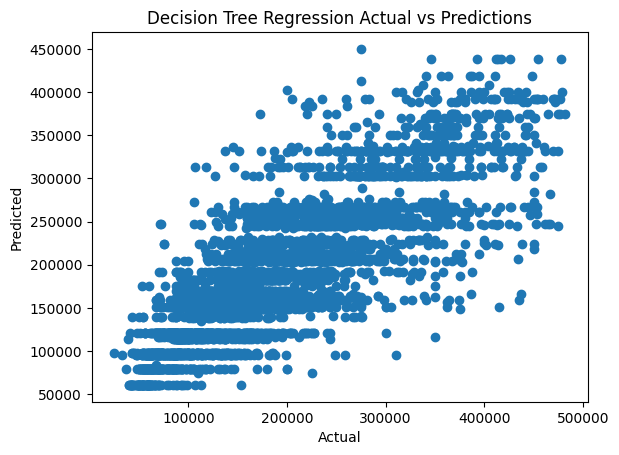

In [107]:
dtr = DecisionTreeRegressor()
param_grid_dtr = {
    "max_depth": [4, 5, 6, 7],
    "criterion": ["absolute_error", "squared_error"]
}
dtr_search = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr)
dtr_search.fit(X_train, y_train)
y_pred_dtr = dtr_search.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_dtr)}, RMSE: {root_mean_squared_error(y_test, y_pred_dtr)}")
print(f"Best Parameters {dtr_search.best_params_}")
plt.scatter(y_test, y_pred_dtr)
plt.title("Decision Tree Regression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Better then linear models but still performance is bad

Fitting 3 folds for each of 40 candidates, totalling 120 fits
R2 Score: 0.8199450612300151, RMSE: 40808.309397718025
Best Parameters {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 0.3, 'max_depth': 20, 'bootstrap': False}


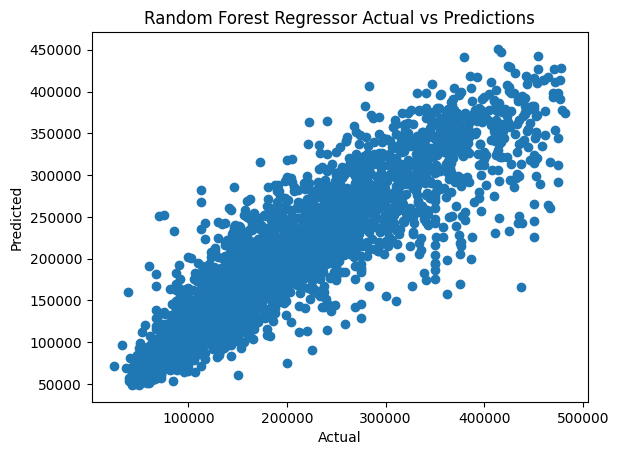

In [108]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor()
param_grid_rfr = {
    "n_estimators": [500, 800, 1200],
    "max_depth": [None, 20, 40, 60],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5],
    "bootstrap": [True, False],
    "max_samples": [None, 0.7, 0.9]
}
rfr_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid_rfr,
                                 cv=3, n_jobs=-1, n_iter=40,
                                   scoring="neg_root_mean_squared_error",
                                     verbose=2, random_state=42)
rfr_search.fit(X_train, y_train)
y_pred_rfr = rfr_search.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_rfr)}, RMSE: {root_mean_squared_error(y_test, y_pred_rfr)}")
print(f"Best Parameters {rfr_search.best_params_}")
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Regressor Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- Good Performance Compared to previous models

Fitting 3 folds for each of 40 candidates, totalling 120 fits
R2 Score: 0.8455846068000451, RMSE: 37791.26069248856
Best Parameters {'colsample_bytree': np.float64(0.6421977039321082), 'gamma': np.float64(2.282672852414551), 'learning_rate': np.float64(0.05150368307119838), 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 1871, 'reg_alpha': np.float64(0.3562978380769749), 'reg_lambda': np.float64(2.3136568830915083), 'subsample': np.float64(0.7088528997538541), 'tree_method': 'hist'}


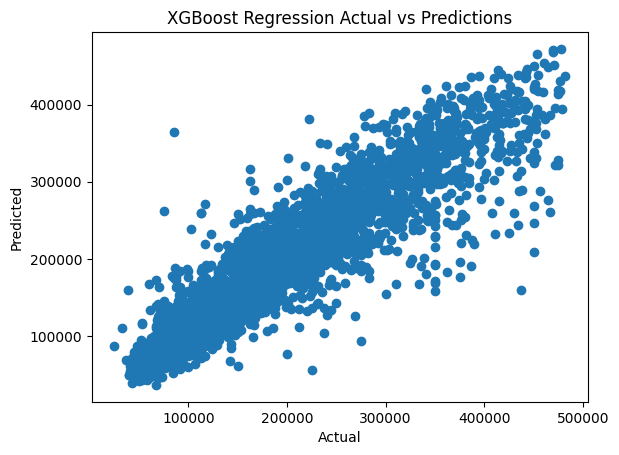

In [109]:
xgb = XGBRegressor()
from scipy.stats import randint, uniform

param_grid_xgb = {
    "n_estimators": randint(500, 2000),
    "max_depth": randint(3, 12),
    "min_child_weight": randint(1, 10),
    "learning_rate": uniform(0.01, 0.19),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 5),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0.5, 2.0),
    "tree_method": ["hist"]
}
xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                 cv=3, n_jobs=-1, n_iter=40,
                                   scoring="neg_root_mean_squared_error",
                                     verbose=2, random_state=42)
xgb_search.fit(X_train, y_train)
y_pred_xgb = xgb_search.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_xgb)}, RMSE: {root_mean_squared_error(y_test, y_pred_xgb)}")
print(f"Best Parameters {xgb_search.best_params_}")
plt.scatter(y_test, y_pred_xgb)
plt.title("XGBoost Regression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- 77 R2 Score, Pretty strong performance!!

0:	learn: 92707.9530514	total: 14.3ms	remaining: 32.8s
1:	learn: 90421.4517797	total: 24.8ms	remaining: 28.4s
2:	learn: 88214.7245415	total: 37.6ms	remaining: 28.7s
3:	learn: 86192.1491026	total: 49.4ms	remaining: 28.3s
4:	learn: 84277.6202726	total: 61ms	remaining: 27.9s
5:	learn: 82369.0317276	total: 72.5ms	remaining: 27.7s
6:	learn: 80764.4854141	total: 85.3ms	remaining: 27.9s
7:	learn: 79135.9736967	total: 97.7ms	remaining: 27.9s
8:	learn: 77557.2580757	total: 109ms	remaining: 27.6s
9:	learn: 76156.0111006	total: 121ms	remaining: 27.7s
10:	learn: 74905.7648215	total: 134ms	remaining: 27.8s
11:	learn: 73557.0194949	total: 147ms	remaining: 28s
12:	learn: 72248.4458877	total: 159ms	remaining: 27.9s
13:	learn: 71132.6855071	total: 171ms	remaining: 27.8s
14:	learn: 69959.2702429	total: 184ms	remaining: 28s
15:	learn: 68980.8469644	total: 196ms	remaining: 27.9s
16:	learn: 68086.9021822	total: 207ms	remaining: 27.8s
17:	learn: 67140.9024251	total: 221ms	remaining: 28s
18:	learn: 66286.672

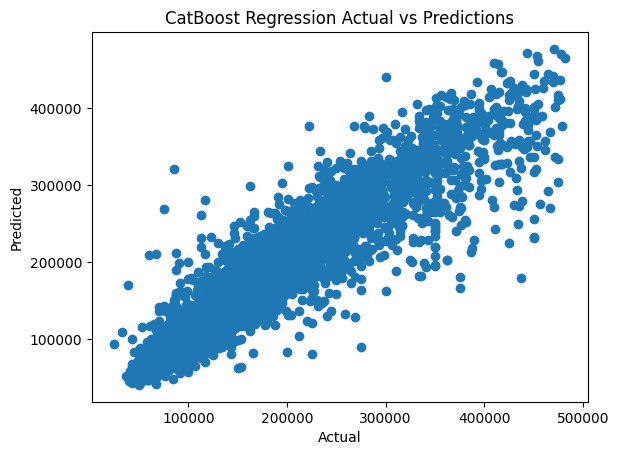

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
cbr = CatBoostRegressor()
param_grid_cbr = {
    "iterations": randint(800, 3000),
    "depth": randint(4, 10),
    "learning_rate": uniform(0.01, 0.19),
    "l2_leaf_reg": uniform(1, 9),
    "subsample": uniform(0.6, 0.4),
    "random_strength": uniform(0, 2),
    "loss_function": ["RMSE"]
}
cbr_search = RandomizedSearchCV(estimator=cbr, param_distributions=param_grid_cbr,
                                cv=3, n_jobs=-1, n_iter=40,
                                scoring="neg_root_mean_squared_error",
                                random_state=42)
cbr_search.fit(X_train, y_train)
y_pred_cbr = cbr_search.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred_cbr)}, RMSE: {root_mean_squared_error(y_test, y_pred_cbr)}")
print(f"Best Parameters {cbr_search.best_params_}")
plt.scatter(y_test, y_pred_cbr)
plt.title("CatBoost Regression Actual vs Predictions")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- CatBoostRegressor with best parameters

In [39]:
best_cbr = CatBoostRegressor(
    depth = 7, iterations = 3000,
    l2_leaf_reg = np.float64(1.12),
    learning_rate = np.float64(0.06),
    loss_function = 'RMSE',
    random_strength = np.float64(1.29),
    subsample = np.float64(1),
    eval_metric="RMSE",
    early_stopping_rounds=100,
    thread_count=-1,
    verbose=0
)
best_cbr.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

In [40]:
y_pred_best_cbr = best_cbr.predict(X_test)
y_pred_train_best_cbr = best_cbr.predict(X_train)
print("____________________Train Set_______________________")
print(r2_score(y_train, y_pred_train_best_cbr))
print(root_mean_squared_error(y_train, y_pred_train_best_cbr))
print("_______________________Test_________________________")
print(r2_score(y_test, y_pred_best_cbr))
print(root_mean_squared_error(y_test, y_pred_best_cbr))

____________________Train Set_______________________
0.9626079653895883
18381.78151795357
_______________________Test_________________________
0.8517550982063304
37028.487045104564


- XGBoostRegressor with Best parameters

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.9,
    gamma = 2.4,
    learning_rate = 0.2,
    max_depth = 6, min_child_weight = 7,
    n_estimators = 1871, reg_alpha = 1,
    reg_lambda = 3,
    subsample = 1, tree_method = 'hist',
    objective = "reg:squarederror"
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)
print("____________________Train Set_______________________")
print(r2_score(y_train, y_pred_train_xgb))
print(root_mean_squared_error(y_train, y_pred_train_xgb))
print("_______________________Test_________________________")
print(r2_score(y_test, y_pred_xgb))
print(root_mean_squared_error(y_test, y_pred_xgb))

____________________Train Set_______________________
0.9995699860941577
1971.2390840184114
_______________________Test_________________________
0.8262936014717545
40082.425328862504


In [41]:
best_cbr.save_model("catboost_california.cbm") ## Saving the CatBoost Model


- RandomForest Regressor with best parameters

In [ ]:
best_rfr = RandomForestRegressor(
    n_estimators = 500, min_samples_split = 5,
    min_samples_leaf = 1, max_samples = None,
    max_features = 0.4, max_depth = 20, bootstrap = False,
    n_jobs=-1
)
best_rfr.fit(X_train, y_train)
y_pred_best_rfr = best_rfr.predict(X_test)
y_pred_train_best_rfr = best_rfr.predict(X_train)
print("____________________Train Set_______________________")
print(r2_score(y_train, y_pred_train_best_rfr))
print(root_mean_squared_error(y_train, y_pred_train_best_rfr))
print("_______________________Test_________________________")
print(r2_score(y_test, y_pred_best_rfr))
print(root_mean_squared_error(y_test, y_pred_best_rfr))

____________________Train Set_______________________
0.9955850280418989
6316.289483959628
_______________________Test_________________________
0.8143743234255539
41434.78683505955


In [46]:
best_cbr.get_feature_importance()

array([ 6.8698329 ,  6.54836032,  4.44683553,  3.07690933, 10.11438947,
        3.28692063,  3.08389999,  6.95833739,  7.79890914,  5.92291299,
        7.80313608,  7.11211539,  3.75617649,  5.60035798,  6.79420079,
       10.82670558])

In [47]:
## Catboost Feature importance
importance = best_cbr.get_feature_importance()

feature_names = [
    "longitude",
    "latitude",
    "housing_median_age",
    "households",
    "median_income",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
    "income_sq",
    "income_log",
    "longitude_sq",
    "latitude_sq",
    "log_x_lat",
    "population_per_household_log",
    "distance_san_fancisco",
    "distance_los_angeles"
]


fi = pd.DataFrame({
    "Feature":feature_names,
    "Importance":importance
}).sort_values(by = "Importance", ascending=False)

fi

,Feature,Importance
15,distance_los_angeles,10.826706
4,median_income,10.114389
10,longitude_sq,7.803136
8,income_sq,7.798909
11,latitude_sq,7.112115
7,population_per_household,6.958337
0,longitude,6.869833
14,distance_san_fancisco,6.794201
1,latitude,6.548360
9,income_log,5.922913


### Results
- CatBoostRegressor Outperforms other algorithms with and impressive R Squared score of 0.8517